In [1]:
import shutil
import os
import random

In [3]:
def math_file_splits(label_folder_path, train_percen = 0.6, valid_percen = 0.2):
    
    num_files = len(os.listdir(label_folder_path)[1:])
    train_count = int(num_files*train_percen)
    valid_count = int(num_files*valid_percen)
    test_count = valid_count
    
    return train_count, valid_count, test_count
    

In [4]:
def images_tvt_split(images_folder_path):
    label1 = os.listdir(images_folder_path)[1]
    label2 = os.listdir(images_folder_path)[0]
    temp_dir = 'delme_temp_images'
    
    
    if os.path.isdir(temp_dir) == False: 
        
        
        shutil.copytree(images_folder_path, temp_dir)
        
        os.makedirs('images_tvt_split')   
    
        for folder in os.listdir(temp_dir)[1:]:
            os.makedirs(f'images_tvt_split/train/{folder}')
            os.makedirs(f'images_tvt_split/valid/{folder}')
            os.makedirs(f'images_tvt_split/test/{folder}')

            folder_path = f'{temp_dir}/{folder}'
            train_count, valid_count, test_count = math_file_splits(folder_path)

            for file in random.sample(os.listdir(folder_path), train_count): 
                shutil.move(f'{folder_path}/{file}', f'images_tvt_split/train/{folder}')
            for file in random.sample(os.listdir(folder_path), valid_count): 
                shutil.move(f'{folder_path}/{file}', f'images_tvt_split/valid/{folder}')
            for file in random.sample(os.listdir(folder_path), test_count): 
                shutil.move(f'{folder_path}/{file}', f'images_tvt_split/test/{folder}')
        
        shutil.rmtree(temp_dir)

    else: 
        return 'temp_directory and/or images_tvt_split directory already exists'


In [5]:
images_tvt_split('images')

In [53]:
# test importing keras model

In [54]:
from tensorflow import keras

In [55]:
model = keras.models.load_model('vgg16_model_longrun1')

In [58]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

img_path = 'sub_images/maksssksksss6.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = tf.keras.applications.vgg16.preprocess_input(img_batch)
input_prediction = model.predict(img_preprocessed)
input_prediction = np.round(input_prediction[0])[0]

In [61]:
from src.plotting import show_single

TypeError: Image data of dtype <U28 cannot be converted to float

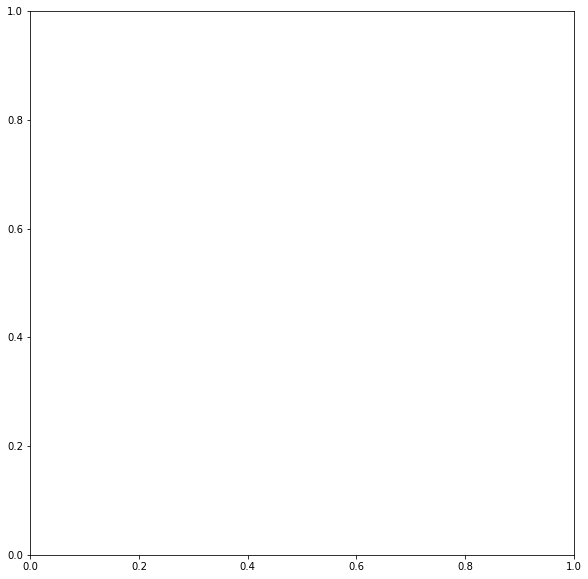

In [62]:
show_single(img_path, input_prediction)